
**House Prices - Advanced Regression Techniques**
 
                          **  Introduction Objective:**
The objective of the project is to perform advance regression techniques to predict the house price in Boston.

**Data Description:**

train.csv - the training set

test.csv - the test set

data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms



**Table of Content:**

Fetch Dataset

Install & Import Libraries

Load Datasets

Exploratory Data Analysis

Feature Engineering

Model Development

Find Prediction



# 1. Fetch datasets from kaggle

# 2. Import Libraries

In [99]:
!pip install missingno

In [100]:
!pip install optuna

In [101]:
!pip install lazypredict==0.2.7

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

from scipy import stats
from scipy.stats import norm, skew # for some statistics
import warnings # to ignore warning
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import lazypredict
from lazypredict.Supervised import LazyRegressor
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV

from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import joblib

print("Library Imported!!")

Library Imported!!


# 3. Load Datasets

In [103]:
# load train and test dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# combined train and test datasets
combined_df = pd.concat([train_df,test_df],axis=0)

# 4. EDA

In [104]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Checking NULL values**

In [106]:
train_df.isnull().sum().sort_values(ascending = False).head(30)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearBuilt          0
dtype: int64

**Missing Value Heat Map**

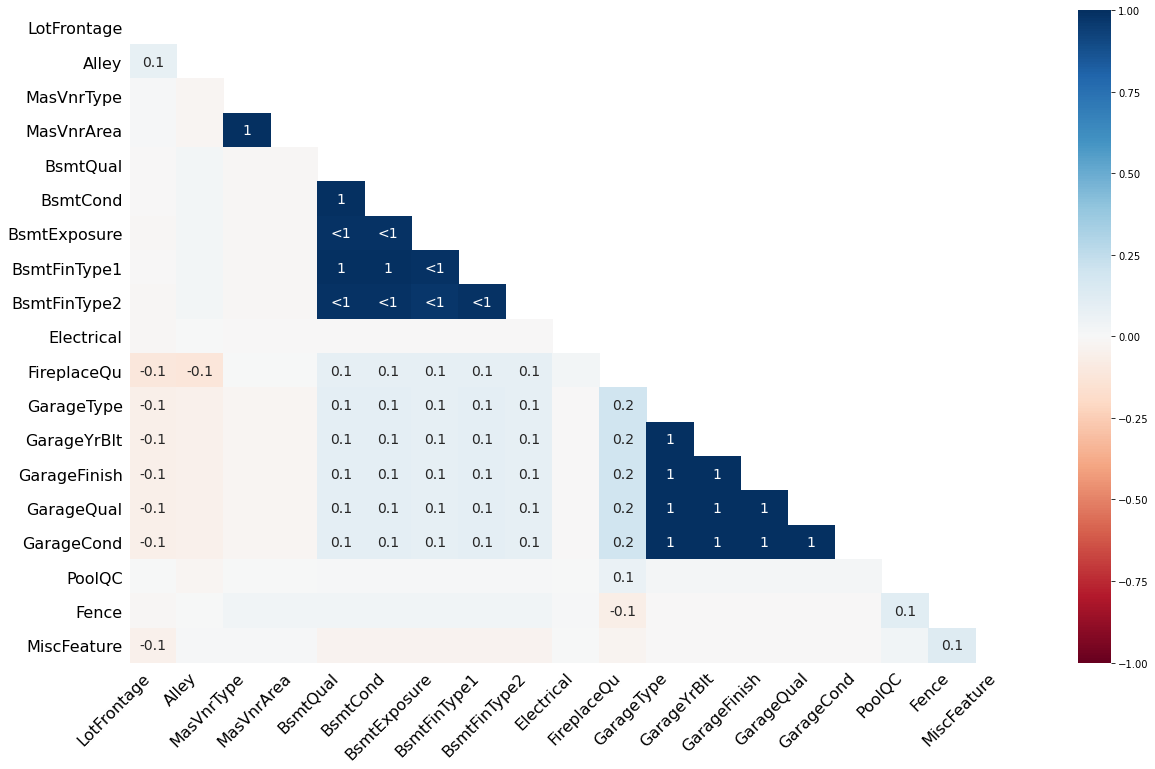

In [107]:
msno.heatmap(train_df)

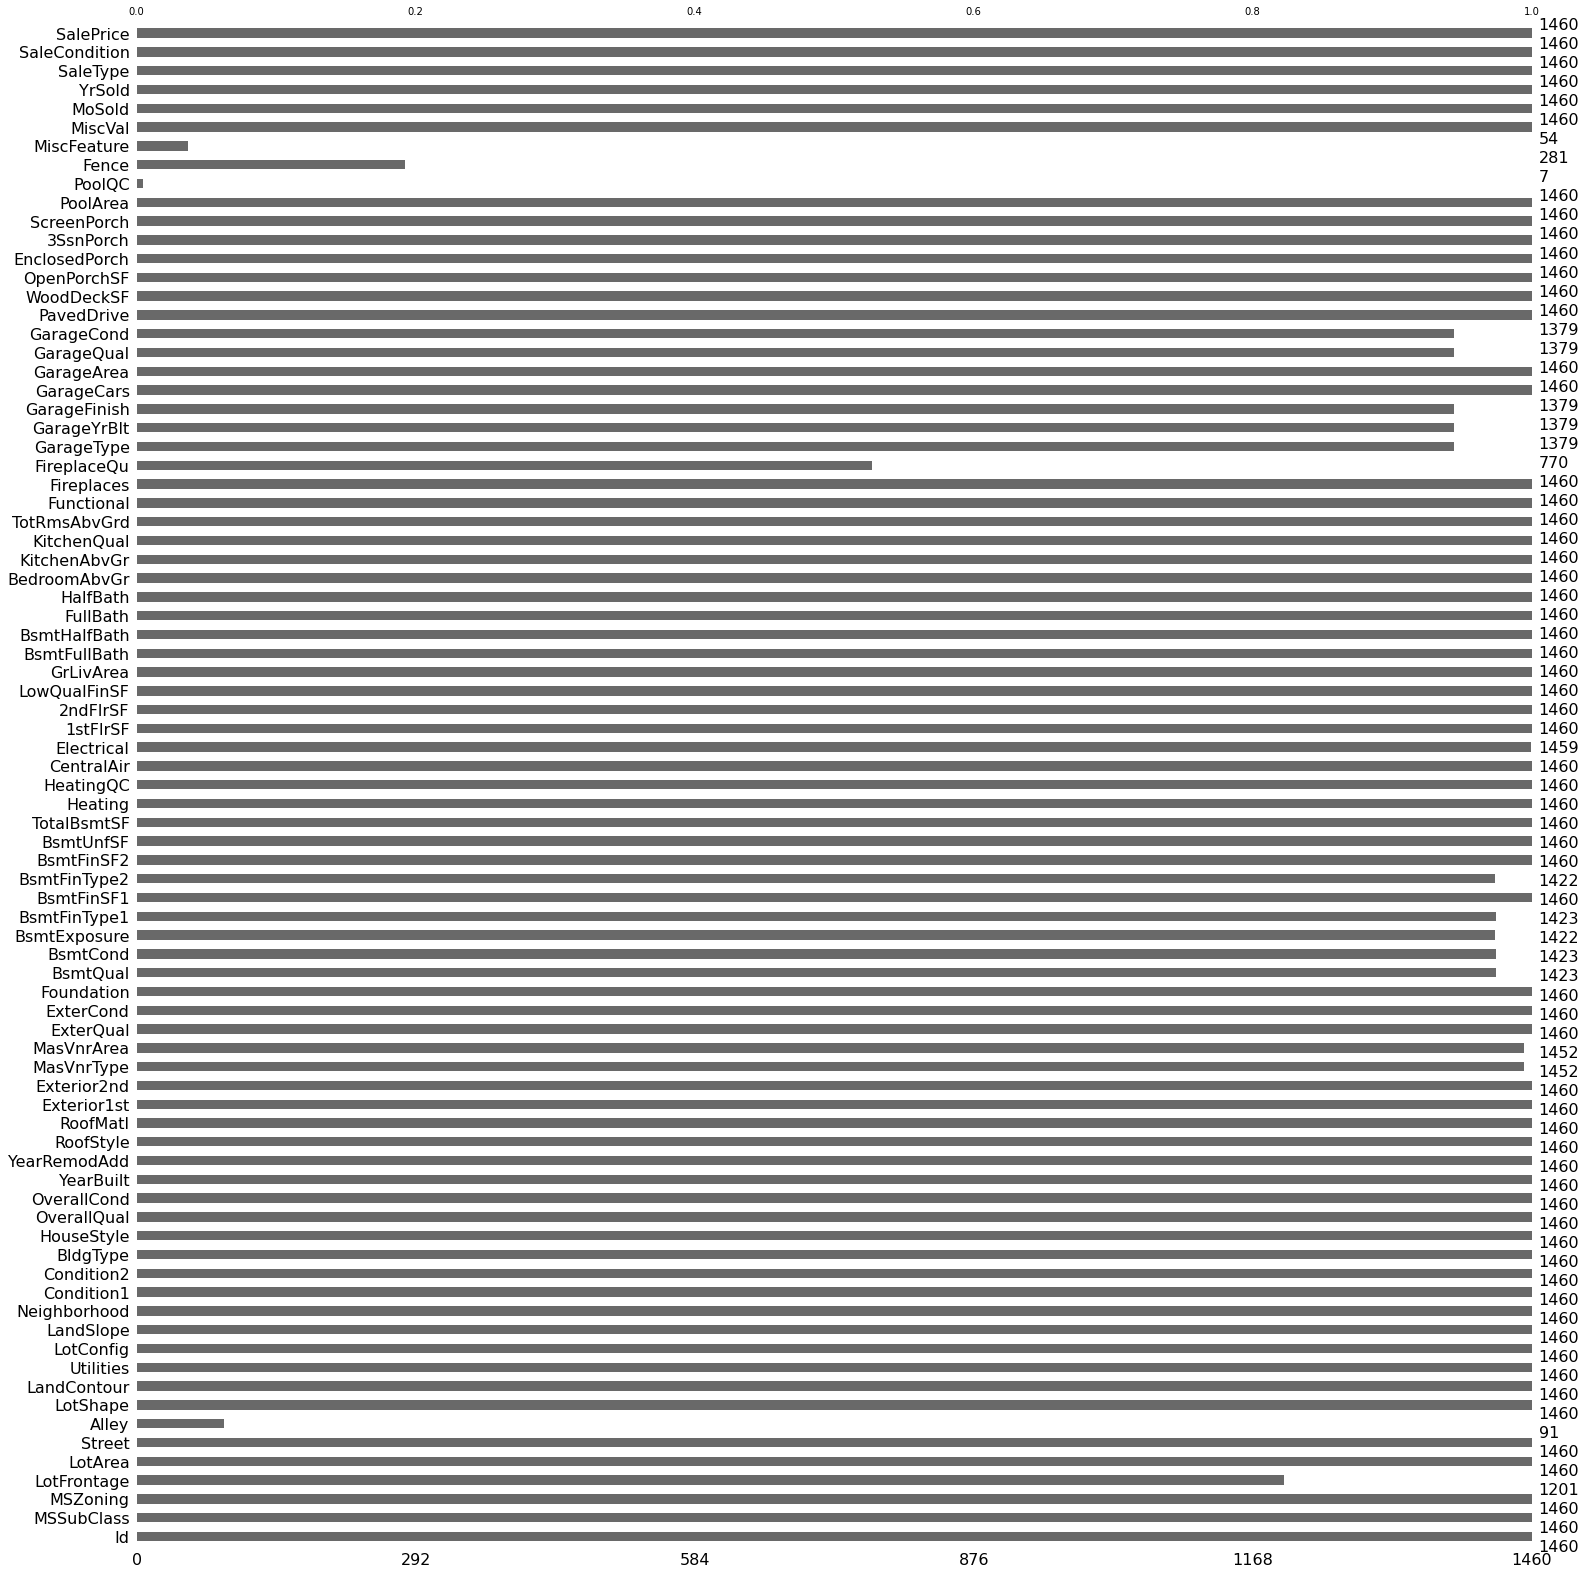

In [108]:
msno.bar(train_df)

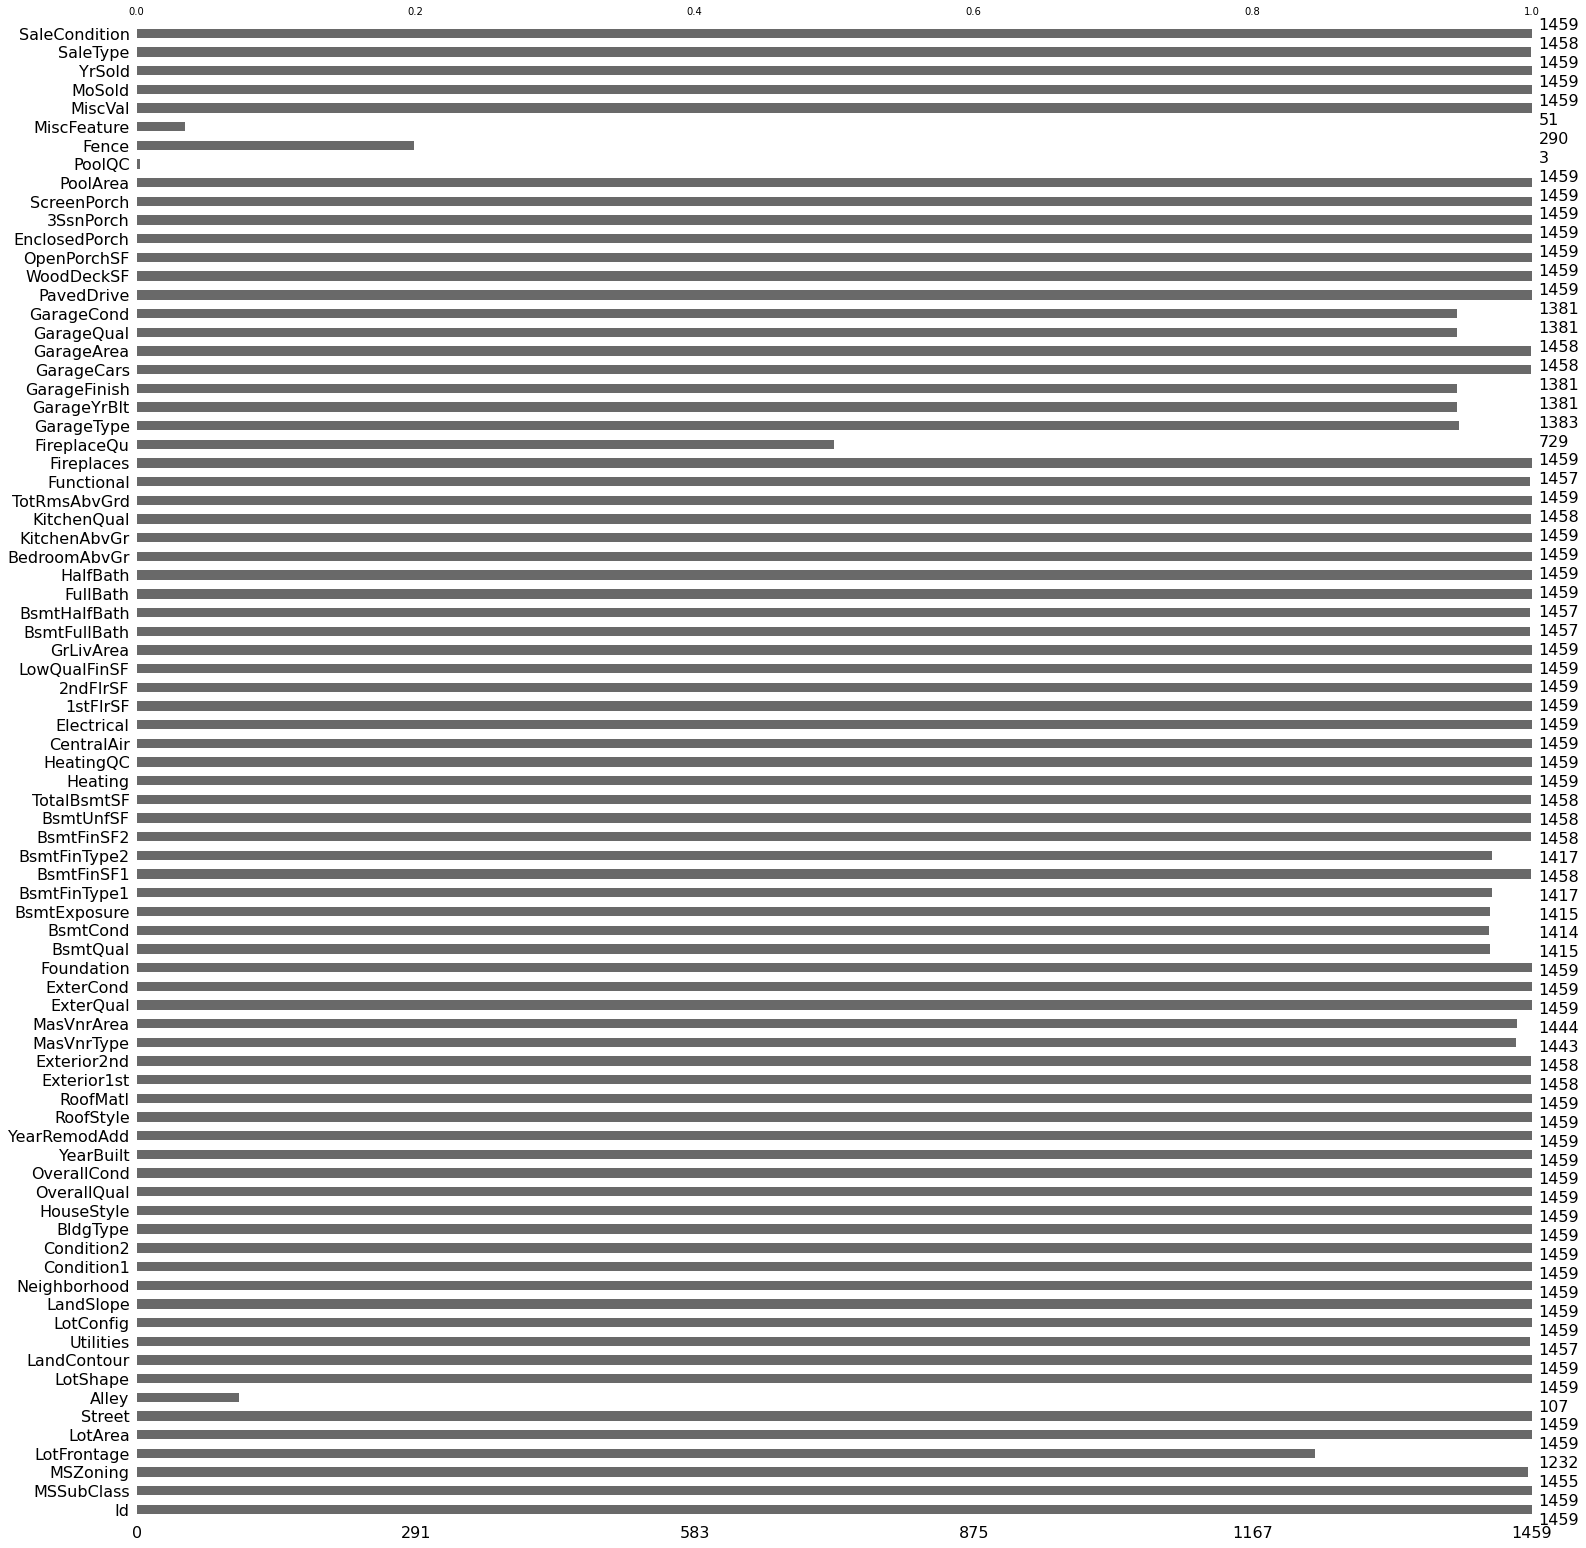

In [109]:
msno.bar(test_df)

No of Missing values in Test set and Train set is Similar

**Dropping Columns with Many Empty values**

In [110]:
combined_df = combined_df.drop('MiscFeature',axis=1)
combined_df = combined_df.drop('Fence',axis=1)
combined_df = combined_df.drop('PoolQC',axis=1)
combined_df = combined_df.drop('Alley',axis=1)

**Handling Column FireplaceQu**

Columns with Empty Fire Place can be considered as NA - No Fireplace

In [111]:
combined_df.loc[combined_df['FireplaceQu'].isnull(),'FireplaceQu'] = 'NA'

In [112]:
train_df_temp = train_df.drop('SalePrice',axis=1)

Comparing the datatypes of train and test set

In [113]:
train_df_temp.dtypes.compare(test_df.dtypes)


,self,other
BsmtFinSF1,int64,float64
BsmtFinSF2,int64,float64
BsmtUnfSF,int64,float64
TotalBsmtSF,int64,float64
BsmtFullBath,int64,float64
BsmtHalfBath,int64,float64
GarageCars,int64,float64
GarageArea,int64,float64


No Difference in Datatypes of training and test



In [114]:
train_df_temp.isnull().sum().compare(test_df.isnull().sum())

,self,other
MSZoning,0.00,4.00
LotFrontage,259.00,227.00
Alley,1369.00,1352.00
Utilities,0.00,2.00
Exterior1st,0.00,1.00
Exterior2nd,0.00,1.00
MasVnrType,8.00,16.00
MasVnrArea,8.00,15.00
BsmtQual,37.00,44.00
BsmtCond,37.00,45.00


No Major Deviation between NULL values in train and test

In [115]:
list_numericalCol =[col for col in combined_df.columns if combined_df[col].dtypes != 'O' and col not in ['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
combined_df[list_numericalCol]


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,60,65.00,8450,7,5,196.00,706.00,0.00,150.00,856.00,856,854,0,1710,1.00,0.00,2,1,3,1,8,0,2.00,548.00,0,61,0,0,0,0,0,2,208500.00
1,20,80.00,9600,6,8,0.00,978.00,0.00,284.00,1262.00,1262,0,0,1262,0.00,1.00,2,0,3,1,6,1,2.00,460.00,298,0,0,0,0,0,0,5,181500.00
2,60,68.00,11250,7,5,162.00,486.00,0.00,434.00,920.00,920,866,0,1786,1.00,0.00,2,1,3,1,6,1,2.00,608.00,0,42,0,0,0,0,0,9,223500.00
3,70,60.00,9550,7,5,0.00,216.00,0.00,540.00,756.00,961,756,0,1717,1.00,0.00,1,0,3,1,7,1,3.00,642.00,0,35,272,0,0,0,0,2,140000.00
4,60,84.00,14260,8,5,350.00,655.00,0.00,490.00,1145.00,1145,1053,0,2198,1.00,0.00,2,1,4,1,9,1,3.00,836.00,192,84,0,0,0,0,0,12,250000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.00,1936,4,7,0.00,0.00,0.00,546.00,546.00,546,546,0,1092,0.00,0.00,1,1,3,1,5,0,0.00,0.00,0,0,0,0,0,0,0,6,nan
1455,160,21.00,1894,4,5,0.00,252.00,0.00,294.00,546.00,546,546,0,1092,0.00,0.00,1,1,3,1,6,0,1.00,286.00,0,24,0,0,0,0,0,4,nan
1456,20,160.00,20000,5,7,0.00,1224.00,0.00,0.00,1224.00,1224,0,0,1224,1.00,0.00,1,0,4,1,7,1,2.00,576.00,474,0,0,0,0,0,0,9,nan
1457,85,62.00,10441,5,5,0.00,337.00,0.00,575.00,912.00,970,0,0,970,0.00,1.00,1,0,3,1,6,0,0.00,0.00,80,32,0,0,0,0,700,7,nan


In [116]:
List_categorical_Columns = [col for col in combined_df.columns if combined_df[col].dtypes == 'O']
train_df[List_categorical_Columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [117]:
numerical_features = [col for col in combined_df.columns if combined_df[col].dtypes != 'O' and col not in ['Id']]
discrete_features = [col for col in numerical_features if len(combined_df[col].unique()) < 25 and col not in ['Id']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['Id']]
categorical_features = [col for col in combined_df.columns if combined_df[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("No of continuous features are : ", len(continuous_features))
print("Number of discrete features : ",len(categorical_features))

Total Number of Numerical Columns :  37
Number of discrete features :  15
No of continuous features are :  22
Number of discrete features :  39


In [118]:
combined_df["Label"] = "test"
combined_df["Label"][:1460] = "train"

Hist Plot on Numerical Feature

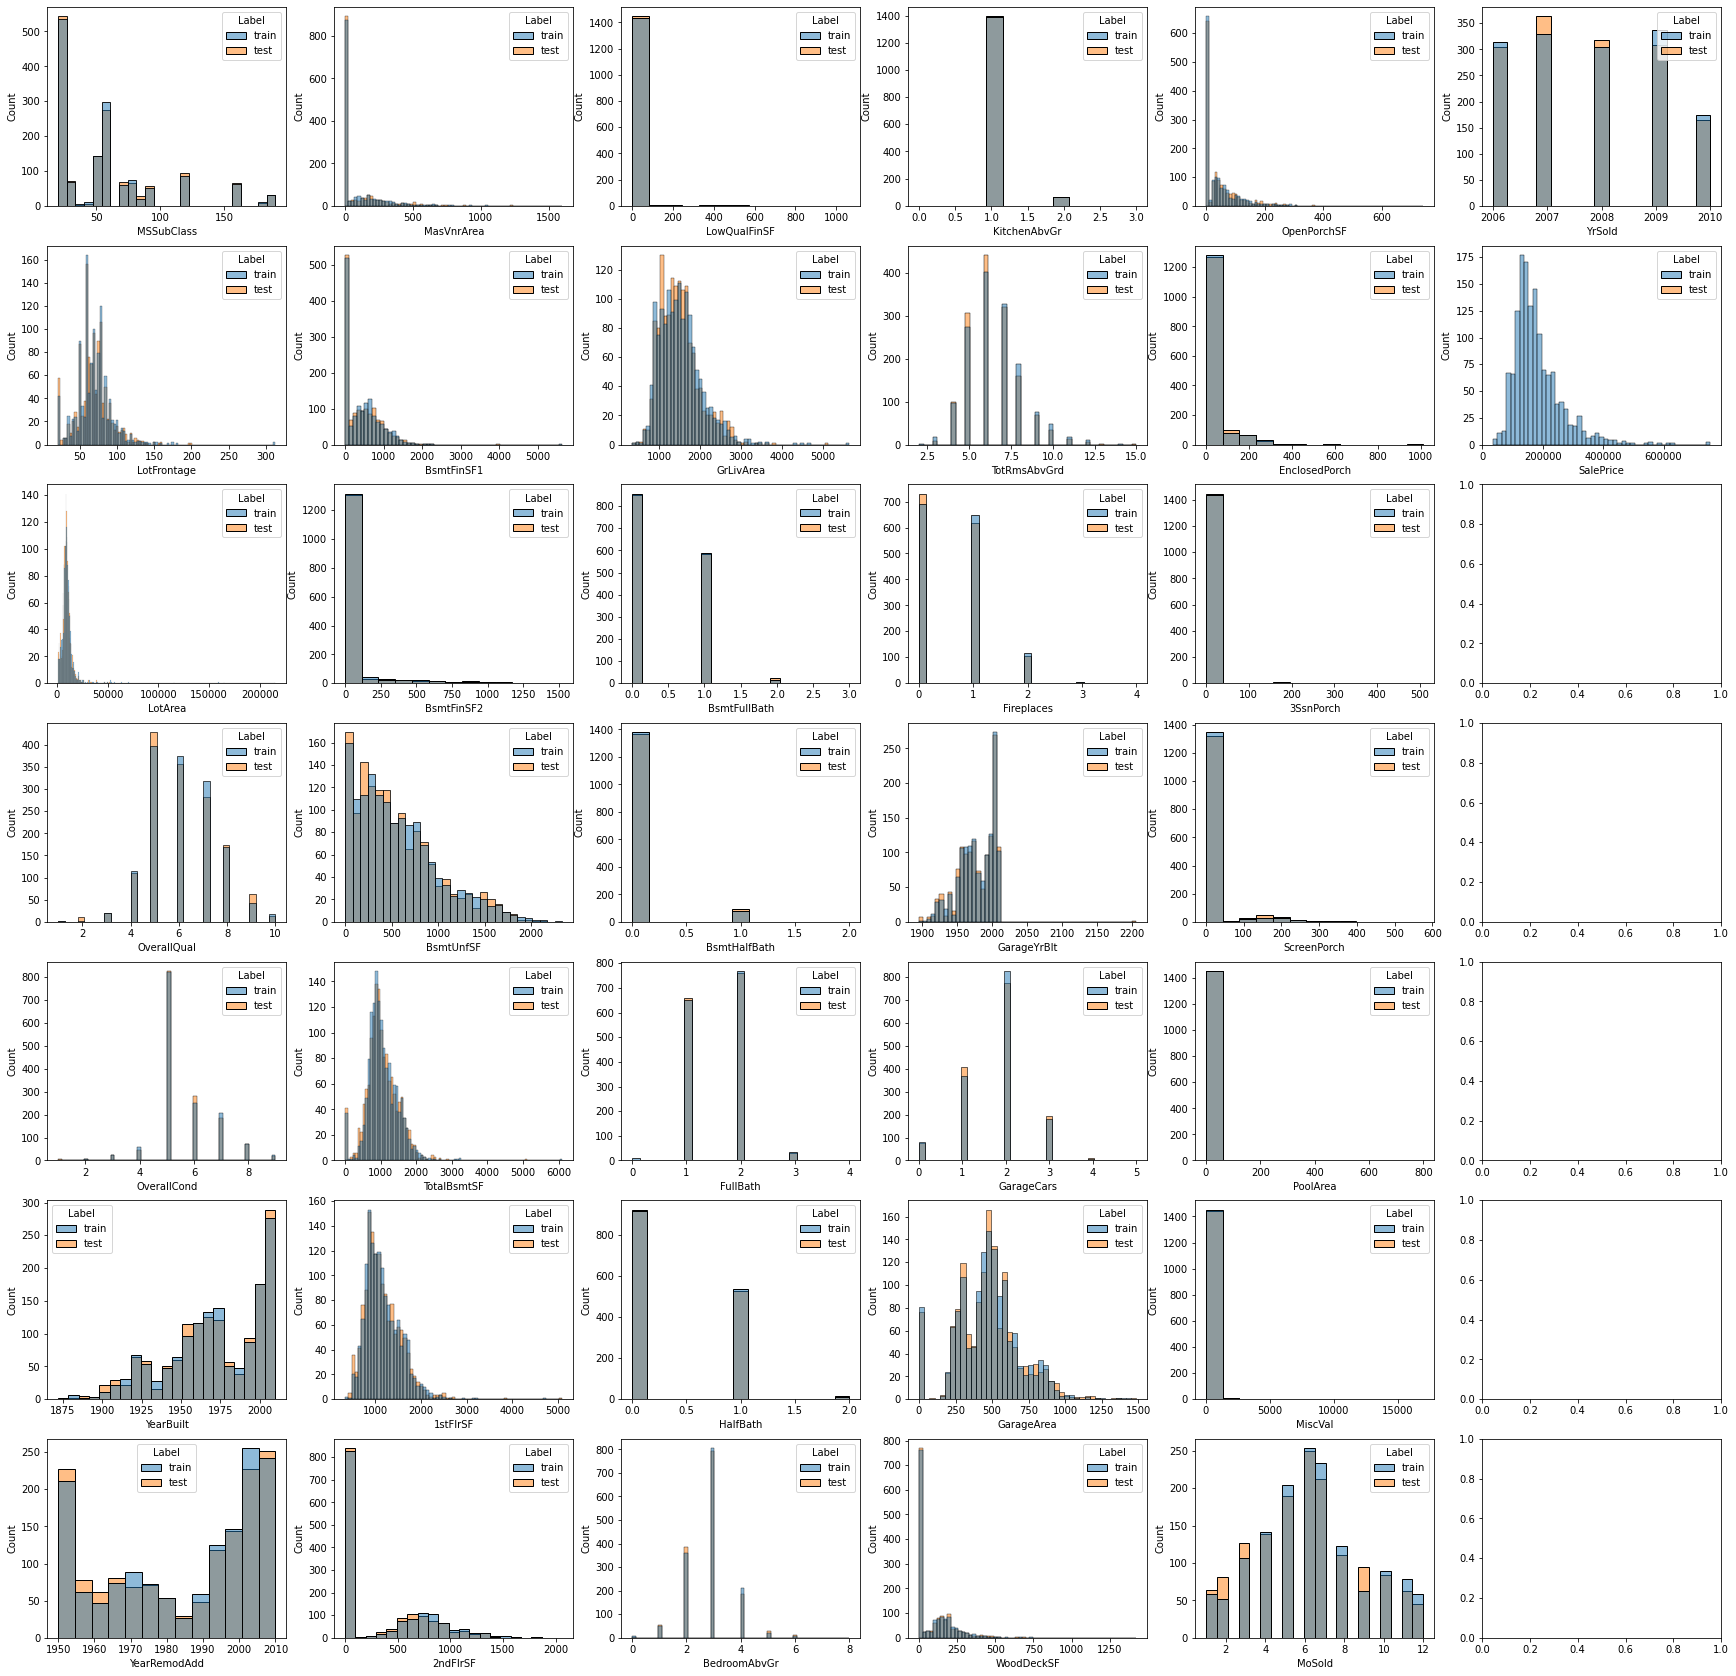

In [119]:
f, axes = plt.subplots( 7,6 , figsize=(30, 30), sharex=False)
# print(type(f),type(axes))
for i, feature in enumerate(numerical_features):
    sns.histplot(data=combined_df, x = feature, hue="Label",ax=axes[i%7,i//7]) 
    

Dropping features with more than 98% of them has values 0

In [120]:
drop_columns = ['Id','LowQualFinSF','MiscVal','PoolArea','3SsnPorch']

for col in drop_columns:
  combined_df = combined_df.drop(col,axis=1)

Count Plot on Categorical Features

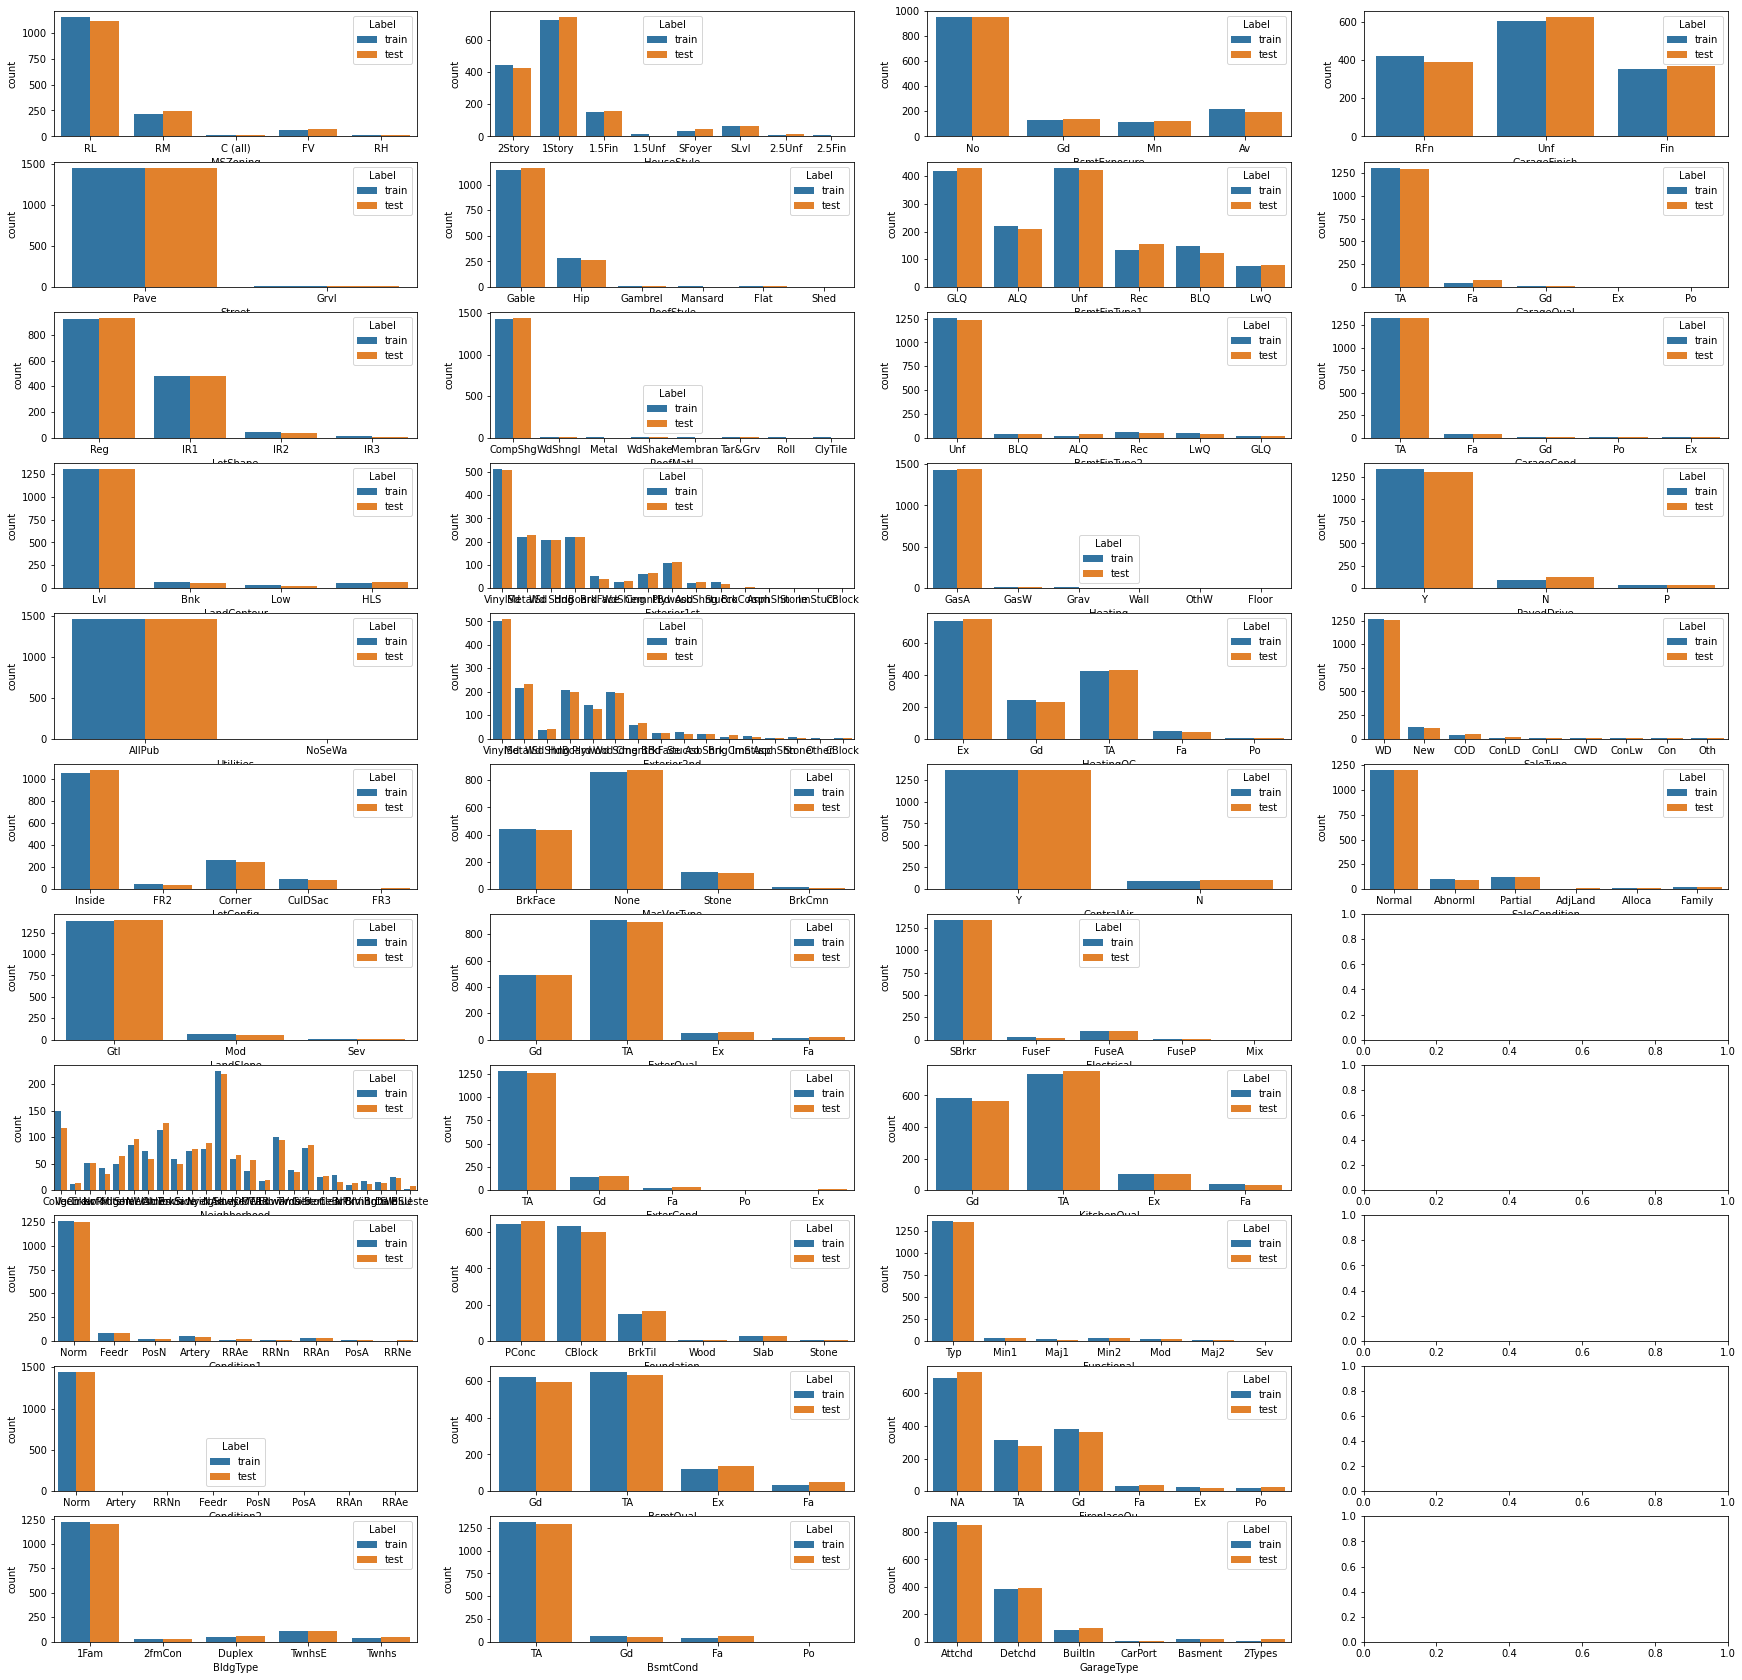

In [121]:
f, axes = plt.subplots( 11,4 , figsize=(30, 30), sharex=False)
# print(type(f),type(axes))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=combined_df, x = feature, hue="Label",ax=axes[i%11,i//11]) 

Scatter Plot on Numerical Features against Target Feature

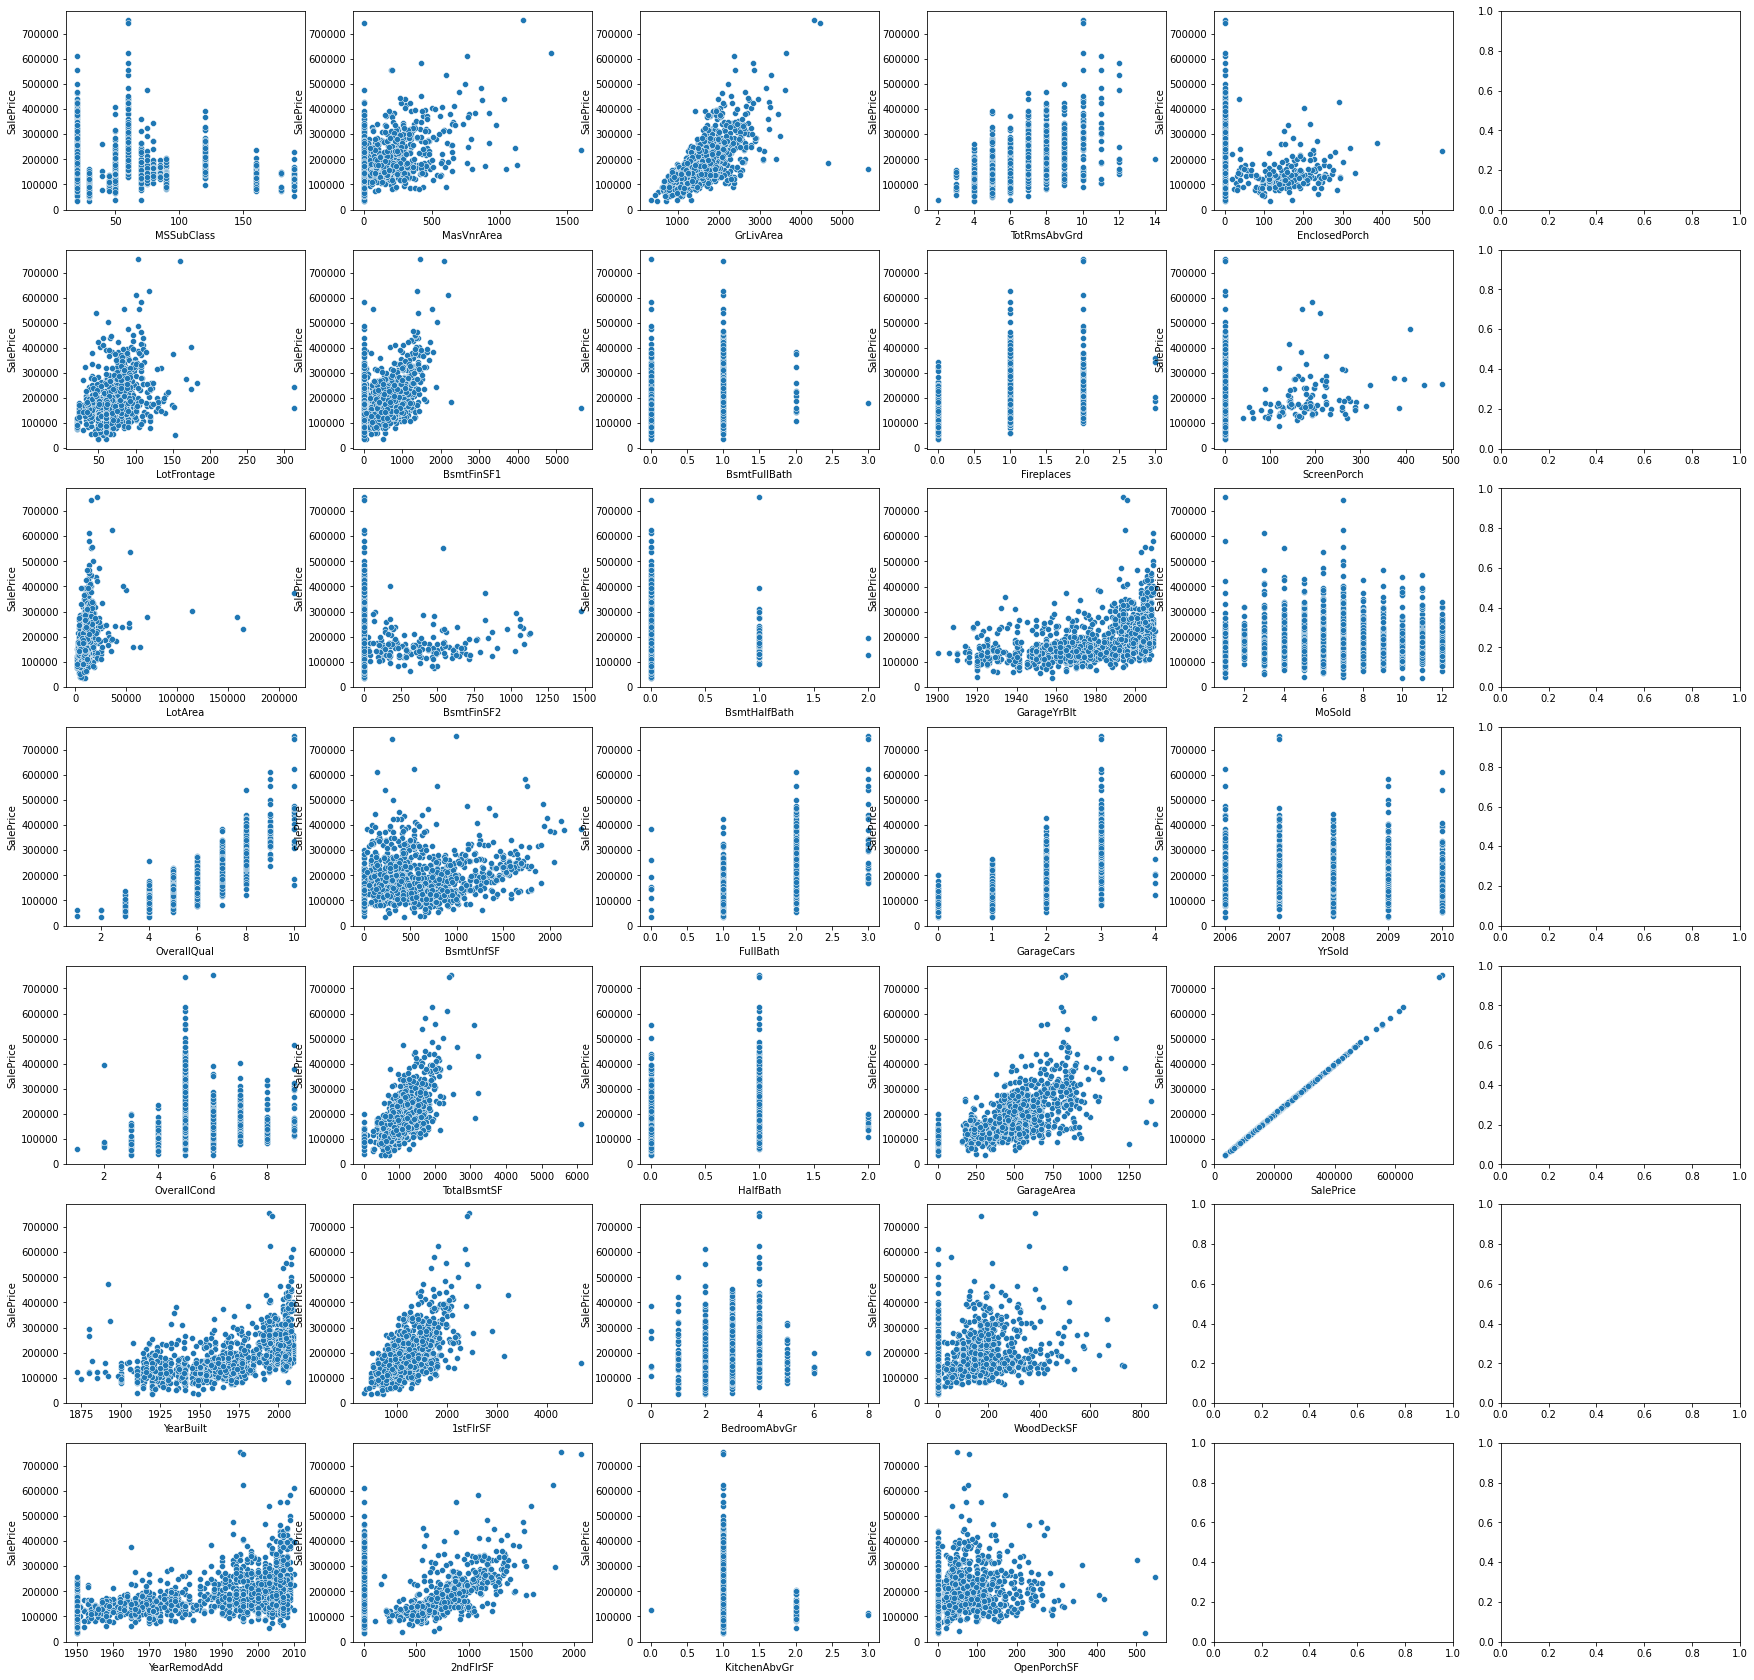

In [125]:
temp_num_col = [ col for col in numerical_features if col not in drop_columns]
f, axes = plt.subplots(7,6 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(temp_num_col):
    sns.scatterplot(data=combined_df, x = feature, y= "SalePrice",ax=axes[i%7, i//7])

Box Plot on Categorical Features

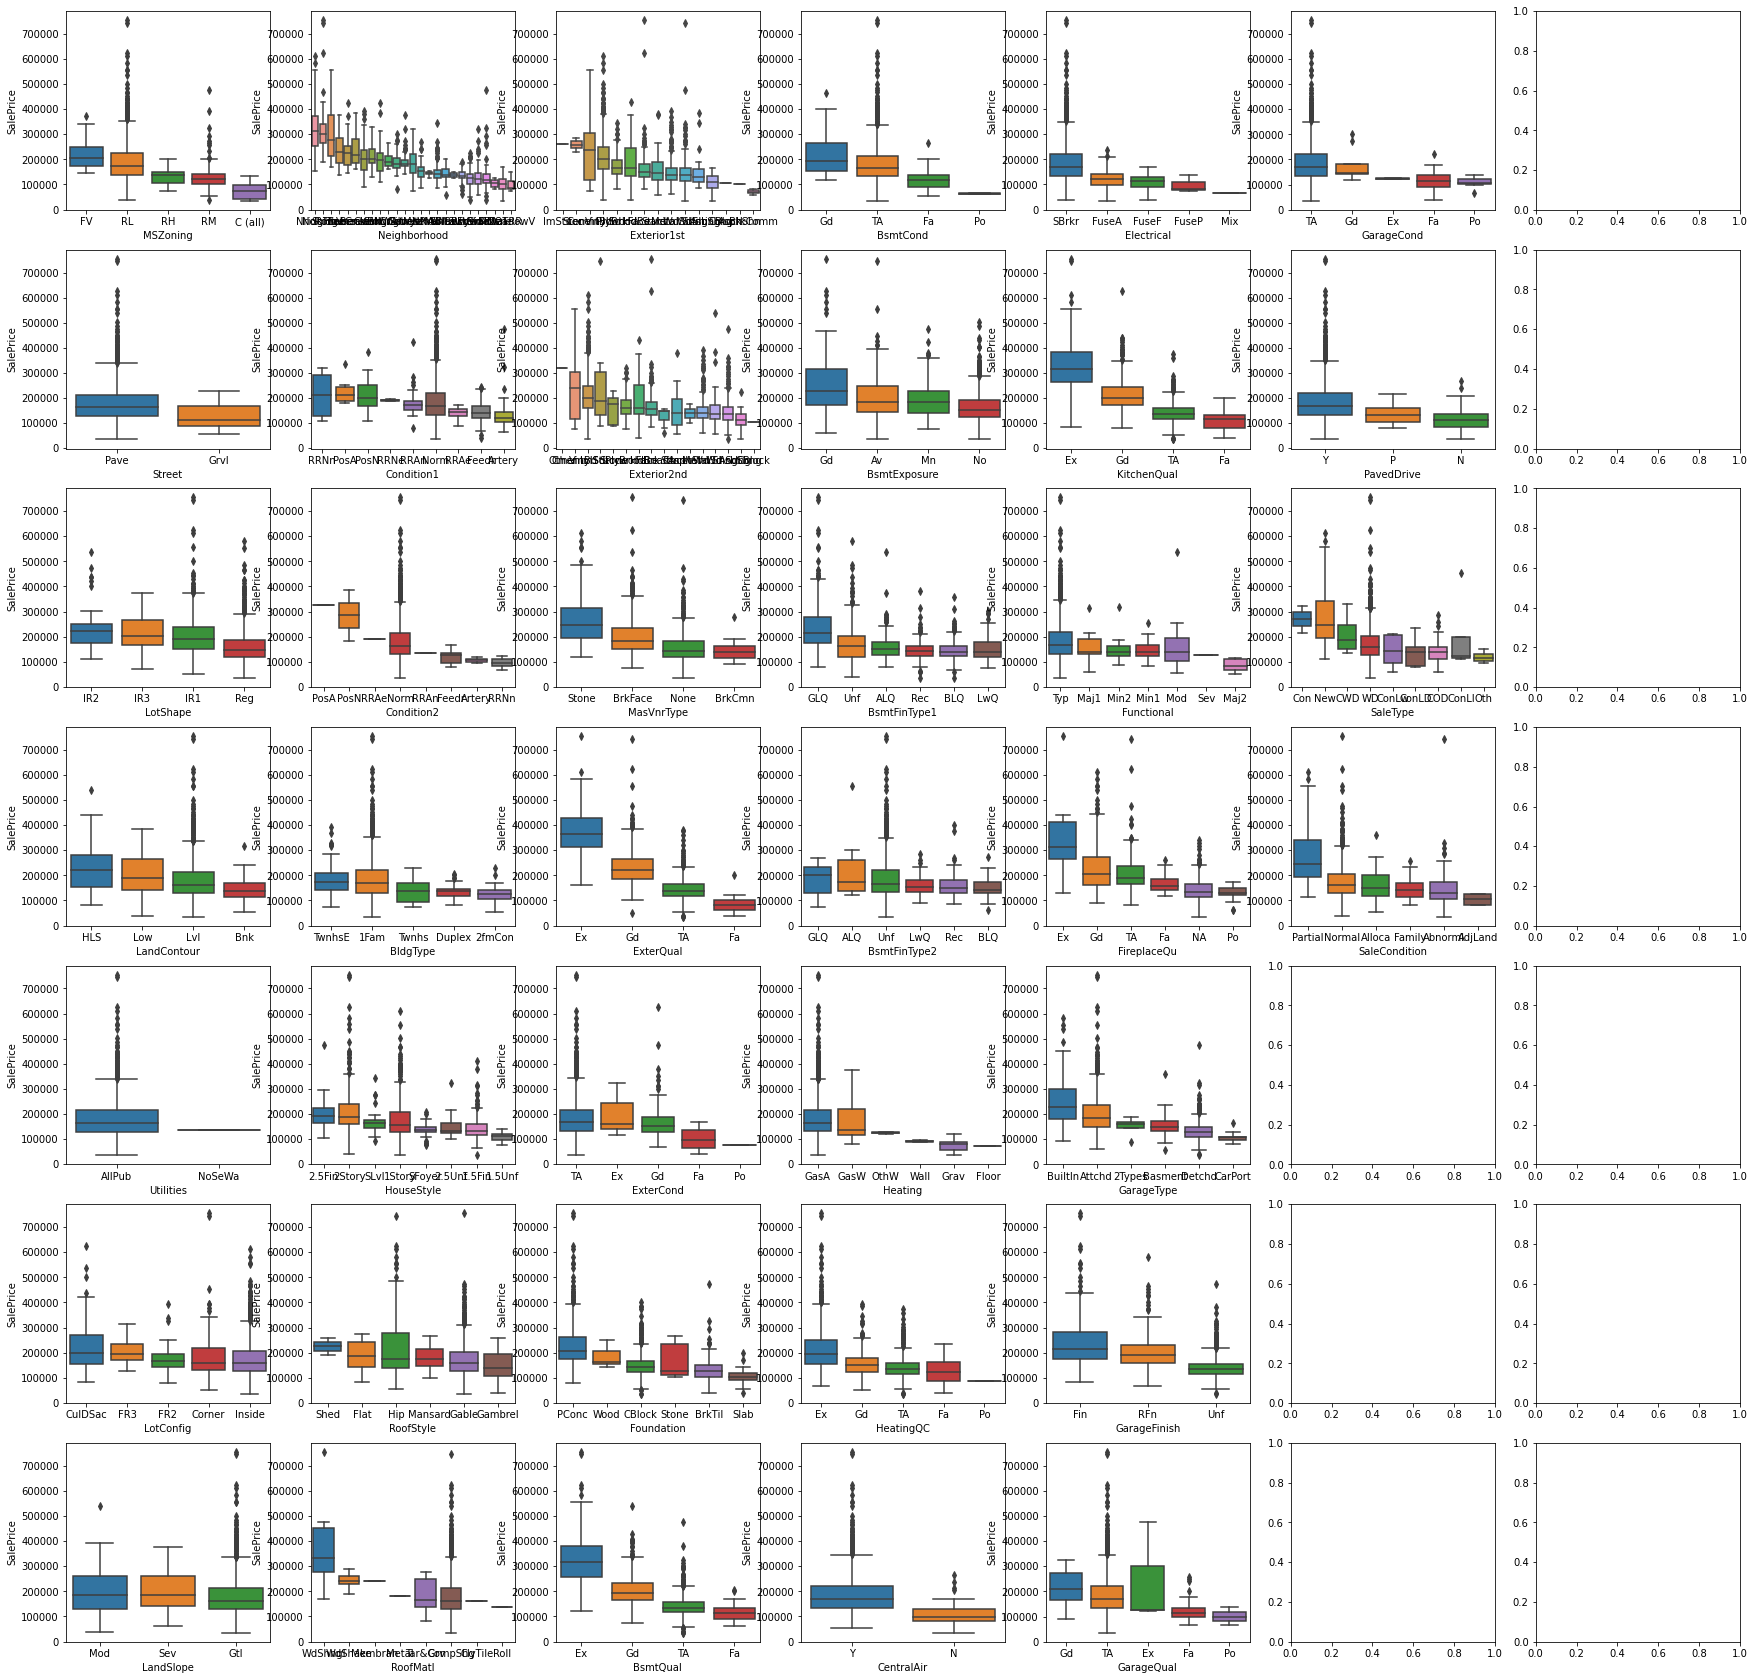

In [126]:
f, axes = plt.subplots(7,7 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(categorical_features):
    #feature = feature+'_code'
    sort_list = sorted(combined_df.groupby(feature)['SalePrice'].median().items(), key= lambda x:x[1], reverse = True)
    order_list = [x[0] for x in sort_list ]
    sns.boxplot(data = combined_df, x = feature, y = 'SalePrice', order=order_list, ax=axes[i%7, i//7])

Handling NULL values of Year Columns

In [127]:
col_yearColumns = ['GarageYrBlt','YrSold','YearBuilt','YearRemodAdd']

In [128]:
for col in col_yearColumns:
  combined_df.loc[combined_df[col].isnull(),col]= combined_df[col].mode()[0]

In [129]:
combined_df['GarageYrBlt'].sort_values(ascending = False).head(30)

1132   2207.00
987    2010.00
378    2010.00
42     2010.00
148    2010.00
819    2010.00
803    2009.00
898    2009.00
404    2009.00
1165   2009.00
251    2009.00
507    2009.00
157    2009.00
212    2009.00
178    2009.00
211    2009.00
581    2009.00
644    2009.00
515    2009.00
1267   2009.00
798    2009.00
28     2009.00
914    2009.00
87     2009.00
112    2009.00
1217   2009.00
16     2009.00
15     2009.00
201    2009.00
103    2009.00
Name: GarageYrBlt, dtype: float64

Treating Outlier for GarageYrBlt

In [130]:
combined_df.loc[combined_df['GarageYrBlt']>2010,'GarageYrBlt'] = 2010

# Feature Engineering

Converting Year Columns to No of years Since

In [131]:
for col in [col for col in col_yearColumns if col not in ['YrSold']]:
  combined_df['NoOfYear_'+col] = np.nan
  combined_df['NoOfYear_'+col] = combined_df['YrSold'] - combined_df[col]
  combined_df = combined_df.drop(col,axis=1)

Treating NULL values for Categorical Features

In [132]:
for col in categorical_features:
  combined_df.loc[combined_df[col].isnull(),col]= combined_df[col].mode()[0]

From the Box plot, The Utilities Column is predominantly having only one feature and hence Dropping the column

In [133]:
combined_df = combined_df.drop('Utilities',axis=1)

Combining Condition1 and Condition 2

In [134]:
combined_df['Conditions'] = np.where(combined_df['Condition1'] != combined_df['Condition2'], combined_df['Condition1'] +','+ combined_df['Condition2'], combined_df['Condition1'])

In [135]:
combined_df = combined_df.drop('Condition1',axis=1)
combined_df = combined_df.drop('Condition2',axis=1)

Spelling Correction

In [136]:
combined_df.loc[combined_df['Exterior1st'] == 'CmentBd','Exterior1st']='CemntBd'
combined_df.loc[combined_df['Exterior2nd'] == 'CmentBd','Exterior2nd']='CemntBd'
combined_df.loc[combined_df['Exterior1st'] == 'Wd Shng','Exterior1st']='WdShing'
combined_df.loc[combined_df['Exterior2nd'] == 'Wd Shng','Exterior2nd']='WdShing'

Combining Exterior1st  and Exterior2nd

In [137]:
combined_df['Exteriors'] = np.where(combined_df['Exterior1st'] != combined_df['Exterior2nd'], combined_df['Exterior1st'] +','+ combined_df['Exterior2nd'], combined_df['Exterior1st'])

In [138]:
combined_df = combined_df.drop('Exterior1st',axis=1)
combined_df = combined_df.drop('Exterior2nd',axis=1)

In [139]:
col_RankingEncoding = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope',
                       'BldgType','HouseStyle','RoofStyle','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond'
,'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
,'Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','RoofMatl','FireplaceQu']

In [140]:
col_OneHotEncoding = ['Conditions','Exteriors','Neighborhood']

From the Box plot, we notice that the Order of the categorical features ranks are almost in the order of Median values. Hence applying label encoding based on the order of the median values

In [141]:
# for col in Columns_labelEncoding:
def LableEncodingBasedOnMedian(columnName):
  global combined_df
  df = combined_df.groupby(columnName).agg({'SalePrice': ['median']}).apply(lambda x: x.sort_values(ascending=True))
  #print(df.head())
  combined_df[columnName+'_code']=np.nan
  for i,row in zip(range(0,len(df.index)),df.index):
    combined_df.loc[combined_df[columnName]==row,columnName+'_code']=i+1
  combined_df = combined_df.drop(columnName,axis=1)


Applying Label and One Hot Encoding

In [142]:
for col in col_RankingEncoding:
  LableEncodingBasedOnMedian(col)

In [143]:
for col in col_OneHotEncoding:
  combined_df = pd.concat([combined_df.drop(col, axis=1), combined_df[col].str.get_dummies(sep=",")], axis=1)

In [144]:
combined_df.isnull().sum().sort_values(ascending=False).head(30)

SalePrice            1459
LotFrontage           486
MasVnrArea             23
BsmtHalfBath            2
BsmtFullBath            2
TotalBsmtSF             1
BsmtUnfSF               1
GarageCars              1
GarageArea              1
BsmtFinSF2              1
BsmtFinSF1              1
LotConfig_code          0
LandSlope_code          0
BldgType_code           0
LandContour_code        0
LotShape_code           0
HouseStyle_code         0
RoofStyle_code          0
MasVnrType_code         0
ExterQual_code          0
Veenker                 0
BsmtExposure_code       0
ExterCond_code          0
Foundation_code         0
BsmtQual_code           0
BsmtCond_code           0
MSZoning_code           0
BsmtFinType1_code       0
BsmtFinType2_code       0
Heating_code            0
dtype: int64

In [145]:
null_features_numerical = [col for col in combined_df.columns if combined_df[col].isnull().sum() > 0 and col not in categorical_features]
null_features_numerical

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'SalePrice']

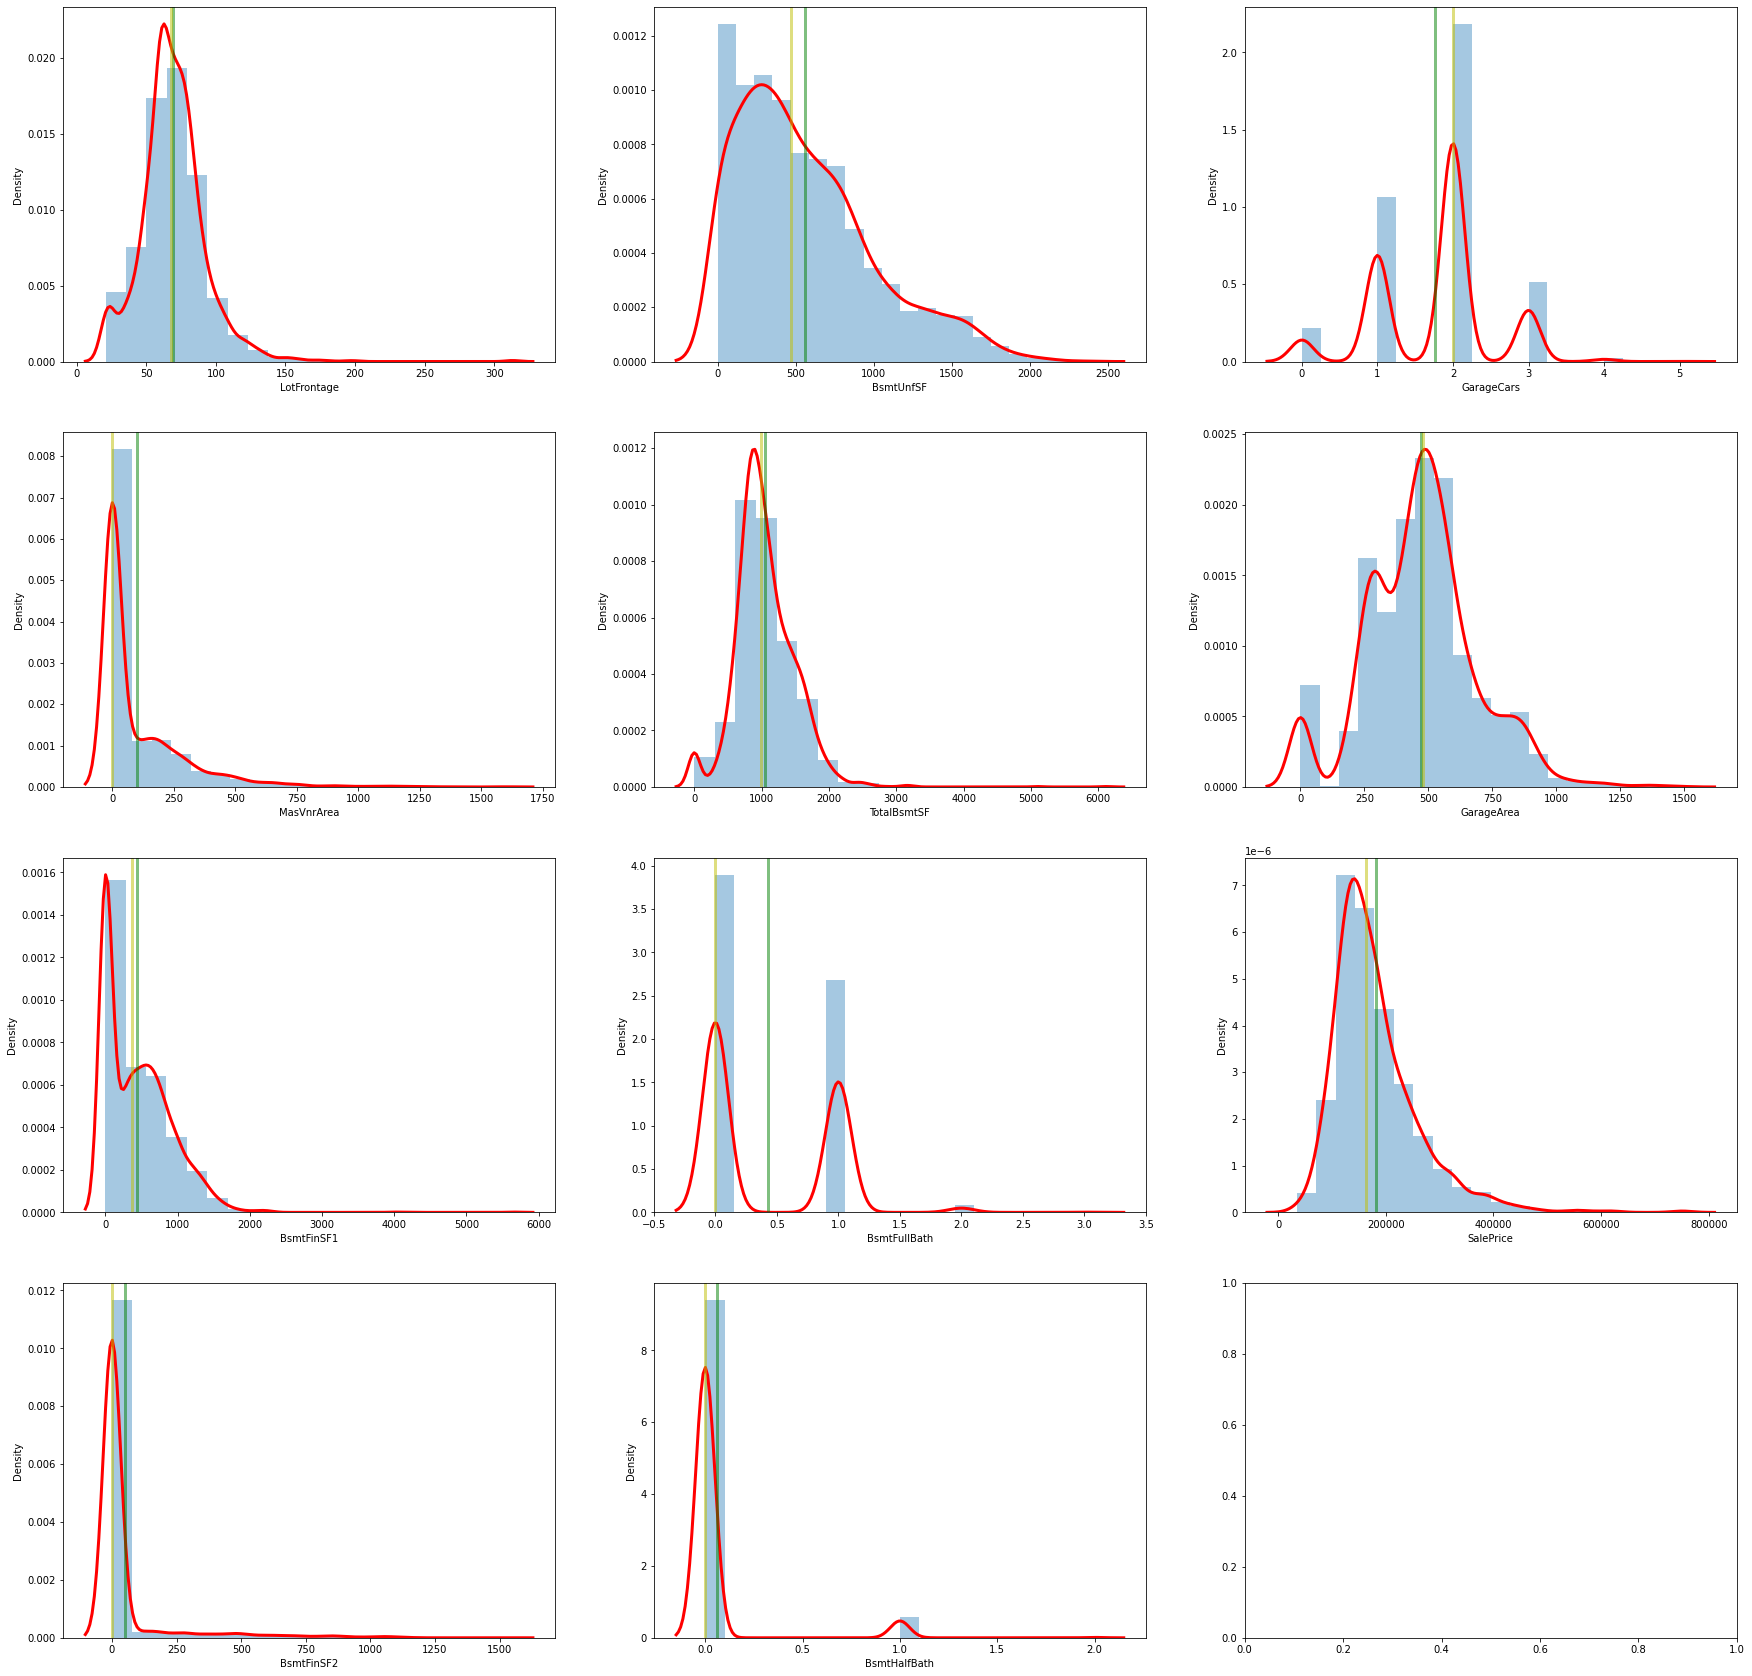

In [146]:
fig, axes = plt.subplots(4,3, figsize=(30, 30))
for i, feature in enumerate(null_features_numerical):
    ax = axes[i%4,i//4]
    sns.distplot(combined_df[feature], bins=20,kde_kws={'linewidth':3,'color':'red'},label="original", ax=ax)
    ax.axvline(x=combined_df[feature].mean(), linewidth=3, color='g', label="mean", alpha=0.5,)
    ax.axvline(x=combined_df[feature].median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.show()

Based on the distribution above, we fill the NULL values for numerical columns with median Values

In [147]:
col_fill_median = ['LotFrontage','MasVnrArea','BsmtHalfBath','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','GarageCars','GarageArea','BsmtFinSF2','BsmtFinSF1']

In [148]:
for col in col_fill_median:
  combined_df.loc[combined_df[col].isnull(),col] = combined_df[col].median()

Checking Skewness

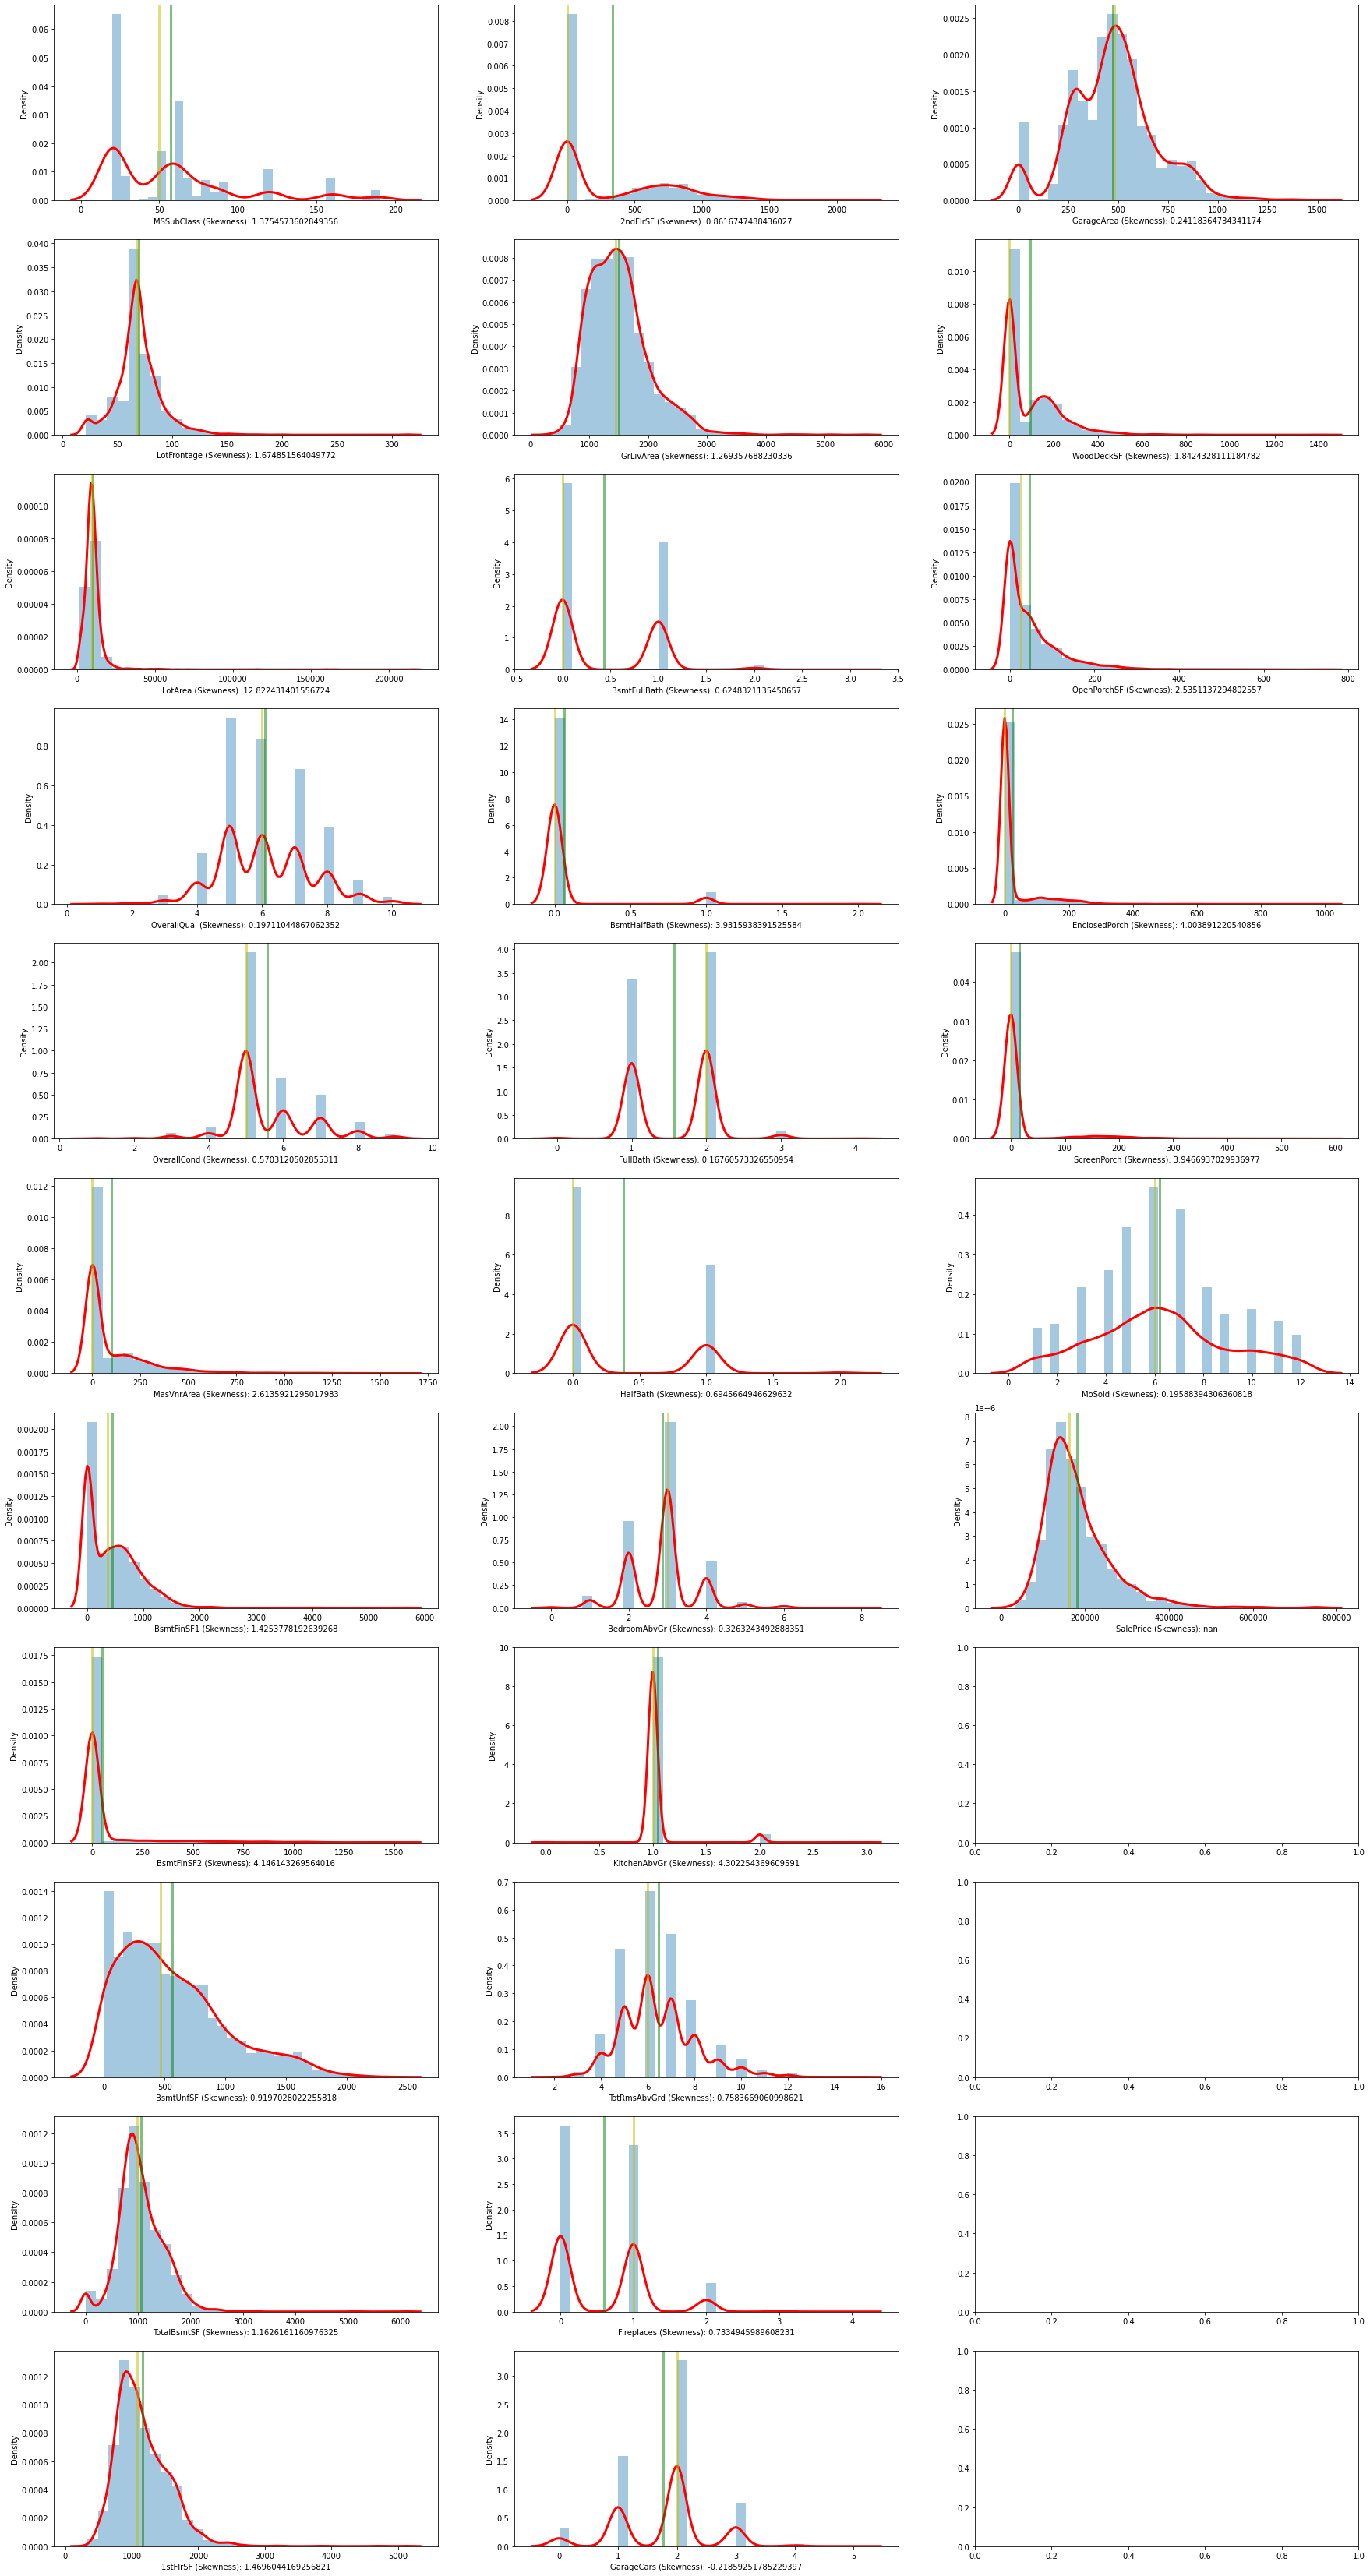

In [151]:
temp_num_col = [col for col in numerical_features if col not in col_yearColumns and col not in drop_columns]

fig, axes = plt.subplots(11,3, figsize=(30, 60))
for i, feature in enumerate(temp_num_col):
    ax = axes[i%11,i//11]
    sns.distplot(combined_df[feature], bins=30,kde_kws={'linewidth':3,'color':'red'},label="original", ax=ax)
    ax.axvline(x=combined_df[feature].mean(), linewidth=3, color='g', label="mean", alpha=0.5,)
    ax.axvline(x=combined_df[feature].median(), linewidth=3, color='y', label="median", alpha=0.5)
    ax.set(xlabel=feature+' (Skewness): '+str(skew(combined_df[feature])))
plt.show()

In [154]:
continuous_col = [elem for elem in temp_num_col if elem not in ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath'
,'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','YrSold','Fireplaces','MoSold','GarageCars','TotRmsAbvGrd']]

In [155]:
skewed_feats = combined_df[continuous_col].apply(lambda x : skew(x)).sort_values(ascending = False)

In [157]:
skewed_feats

LotArea         12.82
BsmtFinSF2       4.15
EnclosedPorch    4.00
ScreenPorch      3.95
MasVnrArea       2.61
OpenPorchSF      2.54
WoodDeckSF       1.84
LotFrontage      1.67
1stFlrSF         1.47
BsmtFinSF1       1.43
GrLivArea        1.27
TotalBsmtSF      1.16
BsmtUnfSF        0.92
2ndFlrSF         0.86
GarageArea       0.24
SalePrice         nan
dtype: float64

In [158]:
col_skewness = ['LotArea','BsmtFinSF2','EnclosedPorch','ScreenPorch','MasVnrArea','OpenPorchSF'
,'WoodDeckSF','LotFrontage','1stFlrSF','BsmtFinSF1','GrLivArea','TotalBsmtSF','BsmtUnfSF','2ndFlrSF']

In [159]:
for col in col_skewness:
    power = PowerTransformer(method='yeo-johnson', standardize=True)
    combined_df[[col]] = power.fit_transform(combined_df[[col]])

In [160]:
skewed_feats = combined_df[continuous_col].apply(lambda x : skew(x)).sort_values(ascending = False)
skewed_feats

ScreenPorch      2.92
BsmtFinSF2       2.36
EnclosedPorch    1.88
MasVnrArea       0.46
2ndFlrSF         0.30
GarageArea       0.24
LotFrontage      0.17
WoodDeckSF       0.14
TotalBsmtSF      0.12
GrLivArea        0.00
1stFlrSF         0.00
LotArea          0.00
OpenPorchSF     -0.03
BsmtUnfSF       -0.28
BsmtFinSF1      -0.40
SalePrice         nan
dtype: float64

In [163]:
train_df = combined_df.loc[combined_df['Label']=='train']
train_df = train_df.drop('Label',axis=1)

In [164]:
test_df = combined_df.loc[combined_df['Label']=='test']
test_df = test_df.drop('Label',axis=1)

In [165]:

X_train = train_df.drop('SalePrice', axis=1)
y_train = np.log1p(train_df['SalePrice'].values.ravel())
# y_train = train_df['SalePrice'].values.ravel()
X_test = test_df.drop('SalePrice', axis=1)

In [166]:
pre_precessing_pipeline = make_pipeline(RobustScaler(), 
                                        # VarianceThreshold(0.001),
                                       )

X_train = pre_precessing_pipeline.fit_transform(X_train)
X_test = pre_precessing_pipeline.transform(X_test)

In [167]:
def MAPE(target,predict):
  target = np.expm1(target)
  predict = np.expm1(predict)
  abs_error= np.absolute(target - predict)
  percent_abs_error = abs_error/target
  mean_abs_per_error = np.mean(percent_abs_error)
  return mean_abs_per_error

In [168]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X_train,y_train,test_size=0.25)

reg= LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=MAPE)
train,test=reg.fit(x_train1,x_test1,y_train1,y_test1)
test

 90%|████████▉ | 35/39 [00:13<00:02,  1.44it/s]

[03:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 39/39 [00:14<00:00,  2.78it/s]


,R-Squared,RMSE,MAPE,Time Taken
Model,,,,
GradientBoostingRegressor,0.91,0.13,0.09,0.65
XGBRegressor,0.90,0.13,0.10,0.36
HuberRegressor,0.90,0.13,0.10,0.21
BayesianRidge,0.90,0.13,0.10,0.05
ElasticNetCV,0.90,0.13,0.10,0.25
LassoCV,0.90,0.13,0.10,0.28
RidgeCV,0.90,0.13,0.10,0.04
LassoLarsCV,0.90,0.13,0.10,0.26
Ridge,0.90,0.13,0.10,0.02


In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
lr = LinearRegression()
lr.fit(x_train1,y_train1)
print(lr.score(x_train1,y_train1))

0.9037408879955299


In [171]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(x_train1, y_train1)
print(my_model.score(x_train1,y_train1))

[03:36:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9882539387153813


In [175]:
print(MAPE(y_train1,my_model.predict(x_train1)))
print(MAPE(y_test1,my_model.predict(x_test1)))

0.03176113642239067
0.08988497953391666


In [173]:
print(np.expm1(y_train1[0:1]),np.expm1(lr.predict(x_train1[0:1])))

[186000.] [159100.67409821]


In [174]:
combined_df.loc[combined_df['SalePrice']>3440,].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,Label,NoOfYear_GarageYrBlt,NoOfYear_YearBuilt,NoOfYear_YearRemodAdd,MSZoning_code,Street_code,LotShape_code,LandContour_code,LotConfig_code,LandSlope_code,BldgType_code,HouseStyle_code,RoofStyle_code,MasVnrType_code,ExterQual_code,ExterCond_code,Foundation_code,BsmtQual_code,BsmtCond_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Heating_code,HeatingQC_code,CentralAir_code,Electrical_code,KitchenQual_code,Functional_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,PavedDrive_code,SaleType_code,SaleCondition_code,RoofMatl_code,FireplaceQu_code,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsbShng,AsphShn,Brk Cmn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,60,-0.13,0.00,7,5,1.25,0.80,-0.37,-0.87,-0.39,0.00,1.18,0.00,1.00,0.00,2,1,3,1,8,0,2.00,548.00,-0.95,0.83,-0.43,-0.31,2,2008,208500.00,train,5.00,5,5,4.00,2.00,1.00,2.00,1.00,1.00,4.00,7.00,2.00,3.00,3.00,5.00,6.00,3.00,3.00,1.00,6.00,4.00,6.00,5.00,2.00,5.00,3.00,7.00,5.00,2.00,4.00,5.00,3.00,6.00,5.00,3.00,2.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,0.57,0.00,6,8,-0.81,1.02,-0.37,-0.42,0.51,0.00,-0.87,0.00,0.00,1.00,2,0,3,1,6,1,2.00,460.00,1.22,-1.08,-0.43,-0.31,5,2007,181500.00,train,31.00,31,31,4.00,2.00,1.00,2.00,3.00,1.00,4.00,5.00,2.00,2.00,2.00,5.00,4.00,3.00,3.00,4.00,4.00,4.00,6.00,5.00,2.00,5.00,2.00,7.00,5.00,2.00,4.00,5.00,3.00,6.00,5.00,3.00,4.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,0.02,0.00,7,5,1.22,0.58,-0.37,-0.03,-0.24,0.00,1.19,0.00,1.00,0.00,2,1,3,1,6,1,2.00,608.00,-0.95,0.65,-0.43,-0.31,9,2008,223500.00,train,7.00,7,6,4.00,2.00,2.00,2.00,1.00,1.00,4.00,7.00,2.00,3.00,3.00,5.00,6.00,3.00,3.00,2.00,6.00,4.00,6.00,5.00,2.00,5.00,3.00,7.00,5.00,2.00,4.00,5.00,3.00,6.00,5.00,3.00,4.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,-0.38,0.00,7,5,-0.81,0.15,-0.37,0.20,-0.62,0.00,1.16,0.00,1.00,0.00,1,0,3,1,7,1,3.00,642.00,-0.95,0.57,2.32,-0.31,2,2006,140000.00,train,8.00,91,36,4.00,2.00,2.00,2.00,2.00,1.00,4.00,7.00,2.00,2.00,2.00,5.00,2.00,2.00,4.00,1.00,4.00,4.00,6.00,4.00,2.00,5.00,3.00,7.00,2.00,1.00,4.00,5.00,3.00,6.00,2.00,3.00,5.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,0.75,0.00,8,5,1.35,0.76,-0.37,0.09,0.26,0.00,1.22,0.00,1.00,0.00,2,1,4,1,9,1,3.00,836.00,1.08,0.98,-0.43,-0.31,12,2008,250000.00,train,8.00,8,8,4.00,2.00,2.00,2.00,3.00,1.00,4.00,7.00,2.00,3.00,3.00,5.00,6.00,3.00,3.00,3.00,6.00,4.00,6.00,5.00,2.00,5.00,3.00,7.00,5.00,2.00,4.00,5.00,3.00,6.00,5.00,3.00,4.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
